<a href="https://colab.research.google.com/github/nahlatafi/skinnea/blob/main/example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for manage the file in os and in the gdrive.
from google.colab import drive
import os

# For read the image
import glob as gb

# Libraries for do visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for do computational things
import numpy as np
import pandas as pd


import datetime

# For evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for Deep learning tasks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Inisialisasi
BASE_DIR = '/content/gdrive/MyDrive/skinnea-dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
VAL_DIR = os.path.join(BASE_DIR, 'val')

In [ ]:
def img_count_in_folder(FOLDER_PATH):  
  print('-'*70)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*70)

In [ ]:
print(''*15+'Training Folder'+''*15)
img_count_in_folder(TRAIN_DIR)

Training Folder
----------------------------------------------------------------------
 489 gambar yang ditemukan di dalam folder Atopic Dermatitis
 260 gambar yang ditemukan di dalam folder Poison Ivy
 392 gambar yang ditemukan di dalam folder Scabies Lyme
----------------------------------------------------------------------


In [ ]:
# print(''*15+'Validation Folder'+''*15)
# print(VAL_DIR)
# img_count_in_folder(VAL_DIR)

In [ ]:
print(''*15+'TEST Folder'+''*15)
print(TEST_DIR)
img_count_in_folder(TEST_DIR)

TEST Folder
/content/gdrive/MyDrive/skinnea-dataset/test
----------------------------------------------------------------------
 104 gambar yang ditemukan di dalam folder Scabies Lyme
  65 gambar yang ditemukan di dalam folder Poison Ivy
 123 gambar yang ditemukan di dalam folder Atopic Dermatitis
----------------------------------------------------------------------


In [ ]:
def show_images(img_files):
  plt.figure()
  fig = plt.figure(figsize=(10, 10))
  fig.patch.set_facecolor('xkcd:gray')

  for i in range(len(img_files)):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split("/")[7]) 
    
  plt.show()


def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith(".jpg"):
              arr.append(os.path.join(root, name))
              break
    return arr

['/content/gdrive/MyDrive/skinnea-dataset/train/Atopic Dermatitis/Atopic Dermatitis(176).jpg', '/content/gdrive/MyDrive/skinnea-dataset/train/Poison Ivy/Poison Ivy (89).jpg', '/content/gdrive/MyDrive/skinnea-dataset/train/Scabies Lyme/Scabies Lyme (1).jpg']


<Figure size 640x480 with 0 Axes>

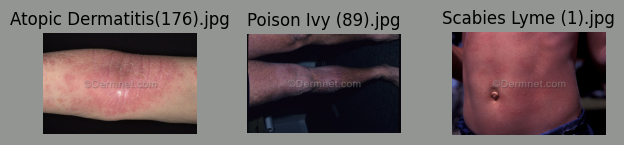

In [ ]:
image_list = list_files(TRAIN_DIR)
print(image_list)
show_images(image_list)

In [ ]:
# Image Augmentation > data validation hasn't been created

# Datagen for validation set dan training set
datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range = 45,
                             zoom_range = 0.1,
                             width_shift_range=0.15, 
                             shear_range= 0.1,
                             height_shift_range=0.15,
                             horizontal_flip=True,
                             vertical_flip= True,
                             fill_mode='nearest',
                             )

# ImageDataGenerator for test set
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Let's try with 224, 224
IMG_SIZE = (224, 224)

# Create train dataset
train_set = datagen.flow_from_directory(TRAIN_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,
                                        seed=42)

Found 1141 images belonging to 3 classes.


In [ ]:
os.listdir(TRAIN_DIR)

['Atopic Dermatitis', 'Poison Ivy', 'Scabies Lyme']

In [ ]:
# os.listdir(VAL_DIR)

In [ ]:
# val_set= val_test_datagen.flow_from_directory(VAL_DIR, 
#                                        class_mode='categorical',
#                                        batch_size= 64,
#                                        target_size=IMG_SIZE
#                                        )

In [ ]:
test_set = val_test_datagen.flow_from_directory(TEST_DIR, 
                                       class_mode='categorical',
                                       batch_size= 64,
                                       target_size=IMG_SIZE
                                       )

Found 292 images belonging to 3 classes.


In [19]:
train_set.class_indices

{'Atopic Dermatitis': 0, 'Poison Ivy': 1, 'Scabies Lyme': 2}

In [21]:
# val_set.class_indices

In [20]:
test_set.class_indices

{'Atopic Dermatitis': 0, 'Poison Ivy': 1, 'Scabies Lyme': 2}

In [23]:
# Check the image

# Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_test and y_test
X_test, y_test = test_set.next()

# # Create variabel X_val and y_val
# X_val, y_val = val_set.next()

In [24]:

class_dict = {v : k for k, v in train_set.class_indices.items()}

def plot_augmented_imgs(X, y):
  labels=[]
  y_label = np.argmax(y, axis=1)
  
  for label in y_label:
    labels.append(class_dict[label])

  for idx in range(0,10):
      plt.figure(figsize=(5, 5))
      plt.imshow(X_train[idx])
      plt.title(labels[idx])

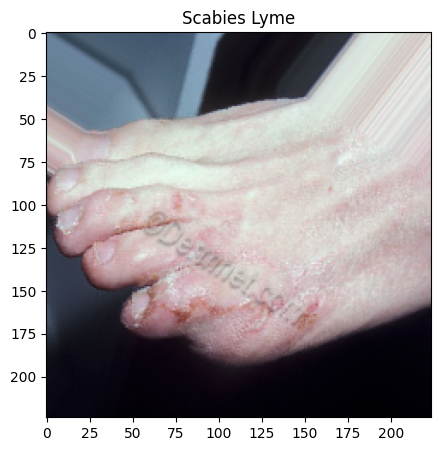

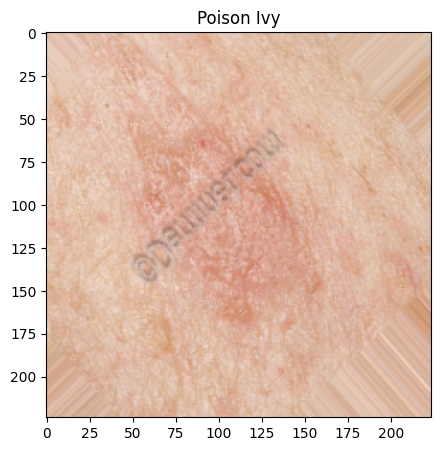

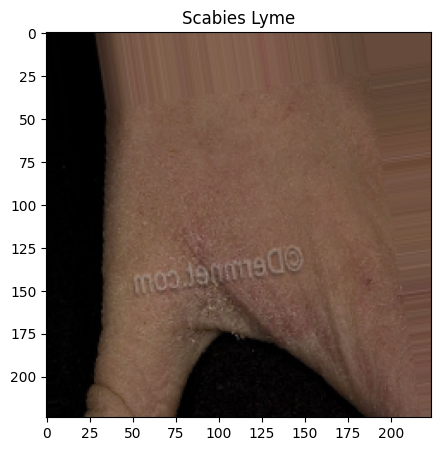

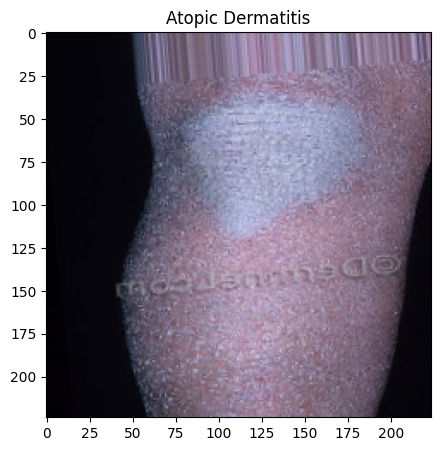

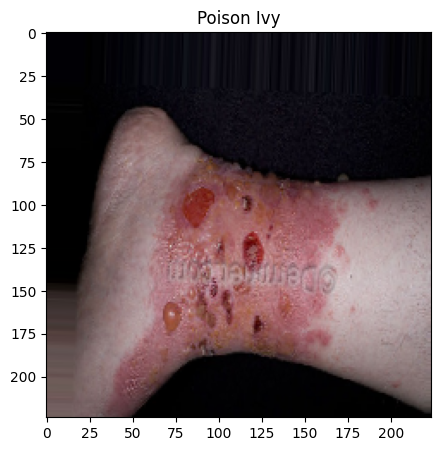

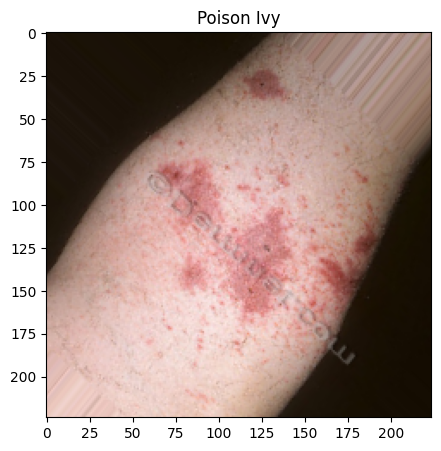

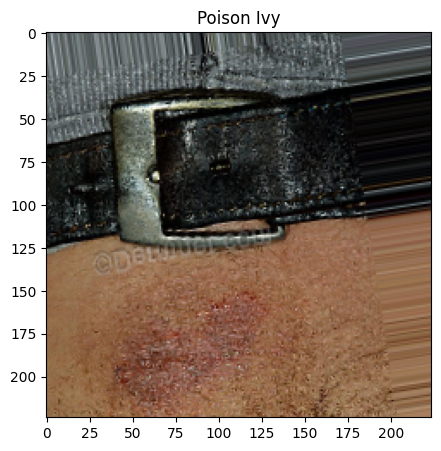

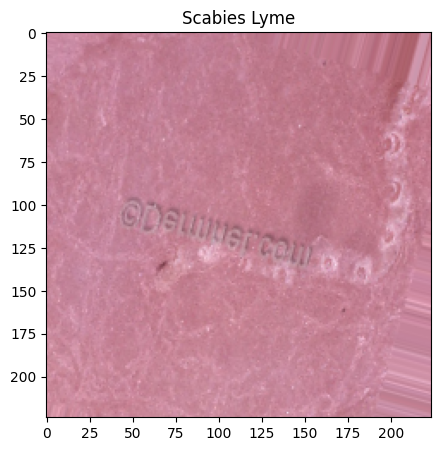

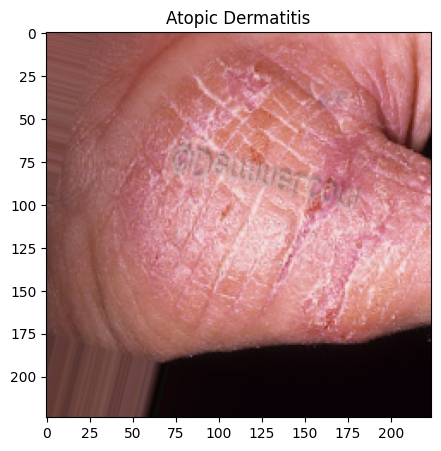

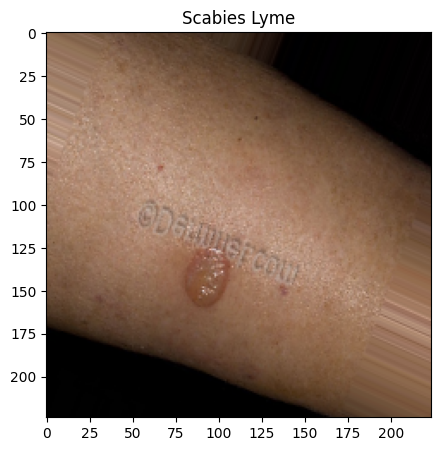

In [25]:

plot_augmented_imgs(X_train, y_train)

In [ ]:
# Looks like we need another dataset screening guys? Before we build the model

# plot_augmented_imgs(X_val, y_val)